## Galaxy Morphology Classification with Machine Learning techniques ##

*University of Cassino and Southern Lazio*

*Computer Engineering (LM-32)*

*Exams: EIID/AIA & Machine and Deep Learning*

Professors: Alessandro Bria and Claudio Marrocco

Students: Alessio Miele and Giulio Russo



## Import libraries ##
All the needed libraries are added in this section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
import os
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Read Features ##
Features are provided in .csv files organized in columns. They are read using pandas library

In [25]:
# specify the features to analyze and the score file name where to save all the scores
features_file = "./features/features.csv" # features file to read
scores_file = "./scores/scores-all_features-PCA185-svm.csv" # scores file where to save the classification scores
results_file = "./results/results-all_features.txt" # results file where to save the parameters and the result of the classification
results = open(results_file, 'w')
df = pd.read_csv(features_file)

# features and class partition
X = pd.DataFrame(df.drop(['FILENAME', 'CLASS'], axis='columns'))
feature_names = X.columns
y = df['CLASS']
filenames = df['FILENAME']

print("Dataset shape (samples, features): " + str(X.shape))

Dataset shape (samples, features): (17733, 898)


## Split train and test ##
Features, classes and file names of the data are split in training and test subsets

In [3]:
X_train, X_test, y_train, y_test, filenames_train, filenames_test= train_test_split(X, 
                                                                                    y,
                                                                                    filenames,
                                                                                    test_size=0.3,
                                                                                    train_size=0.7,
                                                                                    stratify=y,
                                                                                    random_state=42)

print("Training set shape (samples, features): " + str(X_train.shape))
print("Test set shape (samples, features): " + str(X_test.shape))

Training set shape (samples, features): (12413, 898)
Test set shape (samples, features): (5320, 898)


## Feature scaling ##
Features are normalized using the *StandardScaler* function

In [4]:
# feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=feature_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns=feature_names)

## Principal Component Analysis ##
The dimensionality reduction technique of *PCA* is implemented, providing also a visualization tool to see, choosing two features, how data is spread in the feature space

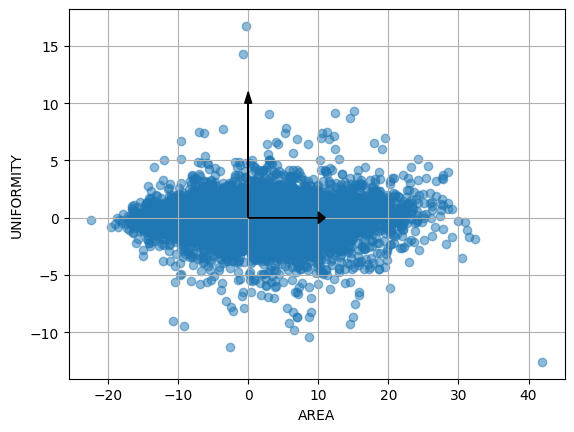

Variance for each feature: [3.528e-01 1.876e-01 1.278e-01 4.800e-02 4.650e-02 3.410e-02 3.220e-02
 1.930e-02 1.720e-02 1.570e-02 1.390e-02 1.190e-02 1.060e-02 1.000e-02
 6.700e-03 6.100e-03 5.600e-03 5.000e-03 4.800e-03 4.000e-03 3.600e-03
 3.300e-03 3.000e-03 2.900e-03 2.400e-03 2.300e-03 2.000e-03 1.800e-03
 1.500e-03 1.400e-03 1.200e-03 1.000e-03 1.000e-03 7.000e-04 7.000e-04
 7.000e-04 7.000e-04 6.000e-04 6.000e-04 5.000e-04 5.000e-04 5.000e-04
 4.000e-04 4.000e-04 4.000e-04 3.000e-04 3.000e-04 3.000e-04 3.000e-04
 3.000e-04 3.000e-04 3.000e-04 2.000e-04 2.000e-04 2.000e-04 2.000e-04
 2.000e-04 2.000e-04 2.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00

In [13]:
# apply PCA
pca = PCA(n_components=185)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# extract two components of the transformed data
num_component_1 = 0
num_component_2 = 12
component_1 = X_train[:, num_component_1]
component_2 = X_train[:, num_component_2]

# compute the scaling factor for the arrows to print
scale_factor = 10

# plot the two components along with their principal components
plt.plot([-1, 1], [0, 0], color='grey', alpha=0.5, zorder=0)
plt.plot([0, 0], [-1, 1], color='grey', alpha=0.5, zorder=0)
plt.scatter(component_1, component_2, alpha=0.5, zorder=1)
plt.arrow(0, 0, pca.components_[0,0]*scale_factor, pca.components_[0,1]*scale_factor, color='k', alpha=1, head_width=1, head_length=1, zorder=2)
plt.arrow(0, 0, pca.components_[1,0]*scale_factor, pca.components_[1,1]*scale_factor, color='k', alpha=1, head_width=1, head_length=1, zorder=2)
plt.xlabel(feature_names[num_component_1])
plt.ylabel(feature_names[num_component_2])
plt.grid(True)
plt.show()

print("Variance for each feature: " + str(np.round(pca.explained_variance_ratio_, 4)) + "\n")
print("New Training set shape: " + str(X_train.shape))
print("New Test set shape: " + str(X_test.shape))

## Feature selection ##
Feature selection is implemented using the *SelectKBest* function and the *f_classif* score function which evaluates the ANOVA F-score on the features, in order to identify the most discriminant ones. The hyperparameter *k* is set to select the *k* most discriminant features

Feature selected: ['AREA', 'PERIMETER', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HU6', 'HU7', 'AXIS_RATIO', 'CIRCULARITY', 'ECCENTRICITY', 'UNIFORMITY', 'ENTROPY', 'CONTRAST0', 'DISSIMILARITY0', 'HOMOGENEITY0', 'ENERGY0', 'CORRELATION0', 'ASM0', 'CONTRAST1', 'DISSIMILARITY1', 'HOMOGENEITY1', 'ENERGY1', 'CORRELATION1', 'ASM1', 'CONTRAST2', 'DISSIMILARITY2', 'HOMOGENEITY2', 'ENERGY2', 'CORRELATION2', 'ASM2', 'CONTRAST3', 'DISSIMILARITY3', 'HOMOGENEITY3', 'ENERGY3', 'CORRELATION3', 'ASM3', 'HIST0_0', 'HIST0_1', 'HIST0_2', 'HIST0_3', 'HIST0_4', 'HIST0_5', 'HIST0_6', 'HIST0_7', 'HIST0_8', 'HIST0_9', 'HIST0_10', 'HIST0_11', 'HIST0_12', 'HIST0_13', 'HIST0_14', 'HIST0_15', 'HIST0_16', 'HIST0_17', 'HIST0_18', 'HIST0_19', 'HIST0_20', 'HIST0_21', 'HIST0_22', 'HIST0_23', 'HIST0_24', 'HIST0_25', 'HIST0_26', 'HIST0_27', 'HIST0_28', 'HIST0_29', 'HIST0_30', 'HIST0_31', 'HIST0_32', 'HIST0_33', 'HIST0_34', 'HIST0_35', 'HIST0_36', 'HIST0_37', 'HIST0_38', 'HIST0_39', 'HIST0_40', 'HIST0_41', 'HIST0_42', 'HIST0_

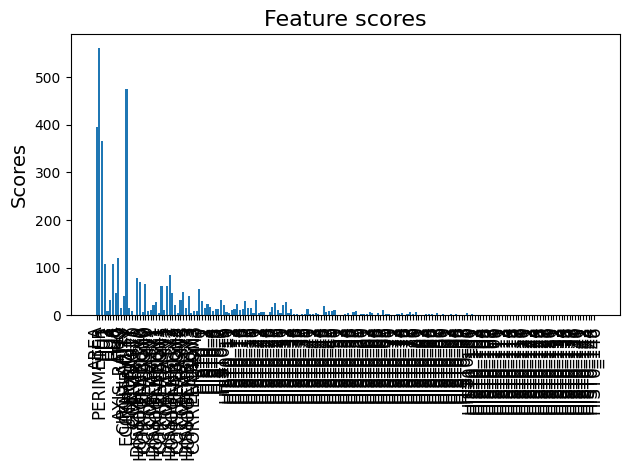

New Training set shape: (12413, 185)
New Test set shape: (5320, 185)


In [14]:
# feature selection
selector = SelectKBest(score_func=f_classif, k=185)
selector_fit = selector.fit(X_train, y_train)
feature_indices = selector_fit.get_support(indices=True)
feature_selected = [X.columns[i] for i in feature_indices]
feature_scores = selector_fit.scores_[feature_indices]
print("Feature selected: " + str(feature_selected))
X_train = pd.DataFrame(selector.transform(X_train), columns=feature_selected)
X_test = pd.DataFrame(selector.transform(X_test), columns=feature_selected)

# show the best features
for i in range(len(feature_selected)):
	print('%s: %f' % (feature_selected[i], feature_scores[i]))

# plot
fig, ax = plt.subplots()
ax.bar(feature_selected, feature_scores)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Feature scores', fontsize=16)
ax.set_xticks(feature_selected)
ax.set_xticklabels([str(i) for i in feature_selected], rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

print("New Training set shape: " + str(X_train.shape))
print("New Test set shape: " + str(X_test.shape))

## Classifiers ##
Several classifiers are implemented. Each one uses a *GridSearch* to evaluate the best parameters using a 10-fold cross validation

## Random Forest ##

In [ ]:
# GridSearchCV for Random Forest classifier

# create the Random Forest classifier
rf = RandomForestClassifier()

# define the hyperparameters to be found in grid search
param_grid = {'n_estimators': [10, 20, 30],                 # number of trees
              'criterion': ['gini', 'entropy', 'log_loss'], # specifies the impurity measurement to use when splitting nodes in the decision tree
              'max_depth': [None, 10, 20]}                  # max depth of exploration of the trees

# grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
print("Best parameters: " + str(best_param) + "\n")
results.write("Best parameters: " + str(best_param) + "\n")
print("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")
results.write("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")

In [ ]:
# define param_grid
param = best_param

# training of the final model with the best parameters on the full training data
rf_final = RandomForestClassifier(**param)
rf_final.fit(X_train, y_train)

# evaluate the performance of the final model using cross-validation
cv_scores = cross_val_score(rf_final, X_train, y_train, cv=10)
print("Cross-validation scores: ", str(np.around(100 * cv_scores, decimals=2)), "%")
results.write("Cross-validation scores: " + str(np.around(100 * cv_scores, decimals=2)) + "%\n")
print("Mean cross-validation score: ", str(round(100 * cv_scores.mean(),2)) + " %")
results.write("Mean cross-validation score: " + str(round(100 * cv_scores.mean(),2)) + " %\n")
print("Standard deviation of cross-validation scores: ", str(round(100 * cv_scores.std(),2)) + " %")
results.write("Standard deviation of cross-validation scores: " + str(round(100 * cv_scores.std(),2)) + " %\n")

# evaluate the performance of the final model on the test set
test_score = rf_final.score(X_test, y_test)
test_proba = rf_final.predict_proba(X_test)
test_proba_max = np.max(test_proba, axis=1)
test_label = np.argmax(test_proba, axis=1)

# identify the classifier on a single variable
clf_final = rf_final

## Support Vector Machine ##

In [ ]:
# GridSearchCV for SVM classifier

# create the SVM classifier
svc = SVC()

# define the hyperparameters to be found in grid search
param_grid = {'C': [0.1, 1, 10, 100],                           # regularization parameter that controls the trade-off between achieving a low training error and a low testing error
              'gamma': [1, 0.1, 0.01, 0.001],                   # influence of a single training example
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}   # function used to map the input data into a higher dimensional space

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", np.around(grid_search.best_score_,decimals=4))

In [ ]:
# define param_grid
param = best_param

# training of the SVM classifier using the best hyperparameters
svc_final = SVC(**param)
svc_final.fit(X_train, y_train)

# evaluate the SVM classifier using cross-validation
cv_scores = cross_val_score(svc_final, X_train, y_train, cv=10)
print("Cross-validation scores: ", str(np.around(100 * cv_scores, decimals=2)), "%")
print("Mean cross-validation score: ", str(round(100 * cv_scores.mean(),2)) + " %")
print("Standard deviation of cross-validation scores: ", str(round(100 * cv_scores.std(),2)) + " %")

# evaluate the performance of the final model on the test set
test_score = svc_final.score(X_test, y_test)
test_distance = svc_final.decision_function(X_test) # distance from the separating hyperplane
test_proba = expit(test_distance) # convert the score to a probability score
test_proba_max = np.max(test_proba, axis=1)
test_label = np.argmax(test_proba, axis=1)

# identify the classifier on a single variable
clf_final = svc_final

## Extra Trees ##

In [20]:
# GridSearchCV for Extra Trees classifier

# create the Extra Trees classifier
et = ExtraTreesClassifier()

# define the hyperparameters to be found in grid search
param_grid = {'n_estimators': [10, 20, 30],                 # number of trees
              'criterion': ['gini', 'entropy', 'log_loss'], # specifies the impurity measurement to use when splitting nodes in the decision tree
              'max_depth': [None, 10, 20]}                  # max depth of exploration of the trees

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(et, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
print("Best parameters: " + str(best_param) + "\n")
results.write("Best parameters: " + str(best_param) + "\n")
print("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")
results.write("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 30}

Best score: 0.5551



19

In [22]:
# define param_grid
param = best_param

# training of the final model with the best parameters on the full training data
et_final = ExtraTreesClassifier(**param)
et_final.fit(X_train, y_train)

# evaluate the performance of the final model using cross-validation
cv_scores = cross_val_score(et_final, X_train, y_train, cv=10)
print("Cross-validation scores: ", str(np.around(100 * cv_scores, decimals=2)), "%")
results.write("Cross-validation scores: " + str(np.around(100 * cv_scores, decimals=2)) + "%\n")
print("Mean cross-validation score: ", str(round(100 * cv_scores.mean(),2)) + " %")
results.write("Mean cross-validation score: " + str(round(100 * cv_scores.mean(),2)) + " %\n")
print("Standard deviation of cross-validation scores: ", str(round(100 * cv_scores.std(),2)) + " %")
results.write("Standard deviation of cross-validation scores: " + str(round(100 * cv_scores.std(),2)) + " %\n")

# evaluate the performance of the final model on the test set
test_score = et_final.score(X_test, y_test)
test_proba = et_final.predict_proba(X_test)
test_proba_max = np.max(test_proba, axis=1)
test_label = np.argmax(test_proba, axis=1)

# identify the classifier on a single variable
clf_final = et_final

Cross-validation scores:  [54.43 54.83 57.25 55.36 54.96 54.96 54.96 55.28 56.   54.23] %
Mean cross-validation score:  55.22 %
Standard deviation of cross-validation scores:  0.82 %


## AdaBoost ##

In [ ]:
# GridSearchCV for Ada Boost classifier

# create the Ada Boost classifier
ab = AdaBoostClassifier()

# define the hyperparameters to be found in grid search
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],    # number of base estimators to be used in the ensemble
              'learning_rate': [0.01, 0.1, 0.5, 1.0],                               # controls the weight of the contribution of each base estimator in the ensemble
              'algorithm': ['SAMME', 'SAMME.R']}                                    # base estimator that is used in the AdaBoost ensemble

# use grid search to find the best hyperparameters
grid_search = GridSearchCV(ab, param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
print("Best parameters: " + str(best_param) + "\n")
results.write("Best parameters: " + str(best_param) + "\n")
print("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")
results.write("Best score: " + str(np.around(grid_search.best_score_,decimals=4)) + "\n")

In [ ]:
# define param_grid
param = best_param

# training of the final model with the best parameters on the full training data
ab_final = AdaBoostClassifier(**param)
ab_final.fit(X_train, y_train)

# evaluate the performance of the final model using cross-validation
cv_scores = cross_val_score(ab_final, X_train, y_train, cv=10)
print("Cross-validation scores: ", str(np.around(100 * cv_scores, decimals=2)), "%")
results.write("Cross-validation scores: " + str(np.around(100 * cv_scores, decimals=2)) + "%\n")
print("Mean cross-validation score: ", str(round(100 * cv_scores.mean(),2)) + " %")
results.write("Mean cross-validation score: " + str(round(100 * cv_scores.mean(),2)) + " %\n")
print("Standard deviation of cross-validation scores: ", str(round(100 * cv_scores.std(),2)) + " %")
results.write("Standard deviation of cross-validation scores: " + str(round(100 * cv_scores.std(),2)) + " %\n")

# evaluate the performance of the final model on the test set
test_score = ab_final.score(X_test, y_test)
test_proba = ab_final.predict_proba(X_test)
test_proba_max = np.max(test_proba, axis=1)
test_label = np.argmax(test_proba, axis=1)

# identify the classifier on a single variable
clf_final = ab_final

## Save labels and scores ##
File name, class, label predicted and score obtained are saved in a .csv file

In [ ]:
# write scores on the scores file
with open(scores_file, "w") as file:
    writer = csv.writer(file)
    # the file store the filename, the groundtruth, the label predicted and the score
    writer.writerow(['FILENAME', 'CLASS', 'LABEL', 'SCORE'])

    # write the infos on the file specified
    for index in range(len(X_test)):
        writer.writerow([filenames_test.iloc[index], int(y_test.iloc[index]), int(test_label[index]), float("{:.4f}".format(test_proba_max[index]))])

## Plot ##

- Class imbalance

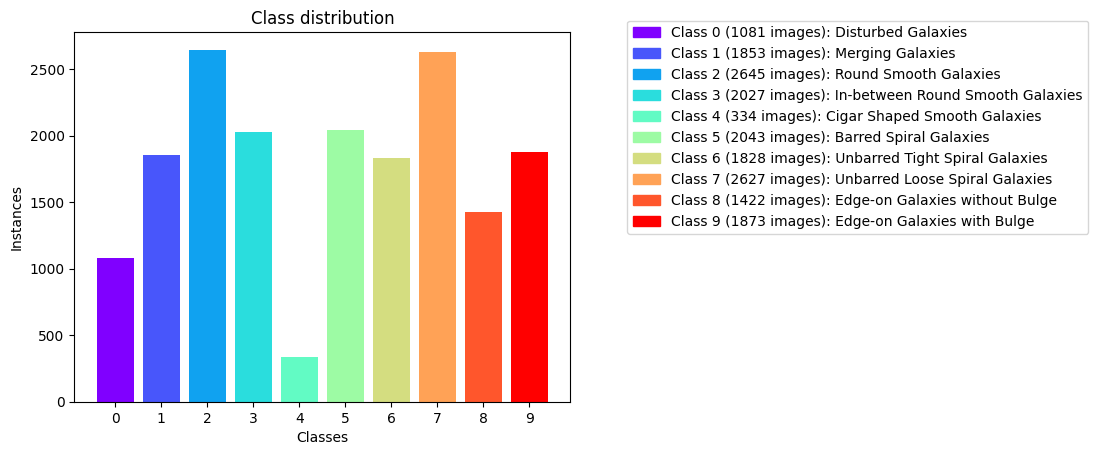

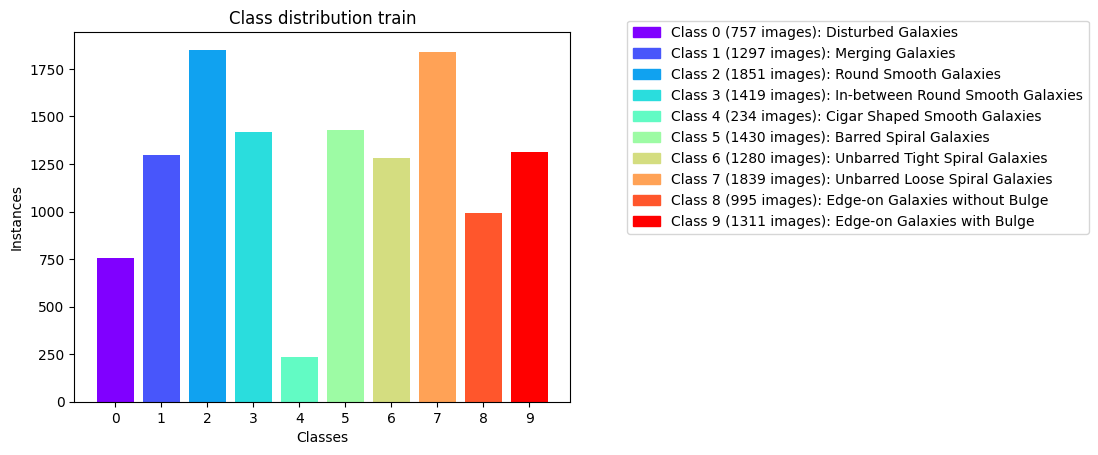

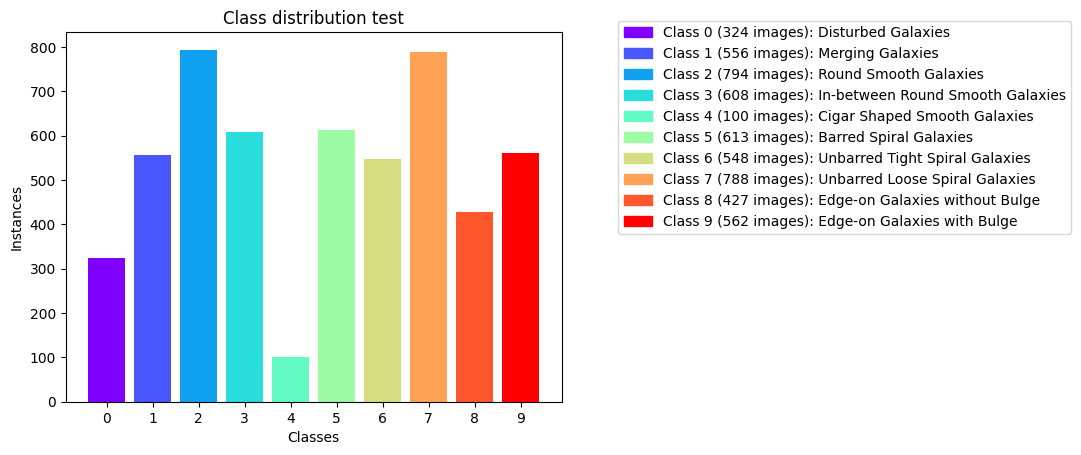

In [16]:
def plot_class_imbalance(classes, title):

    # plot the class distribution
    counter = Counter(classes)
    keylist = list(counter.keys())

    # plot bar plot with different colors for each class
    class_values = classes.values
    class_labels = np.unique(class_values)
    colors = cm.rainbow(np.linspace(0, 1, len(class_labels)))
    keylist.sort()
    for i, key in enumerate(keylist):
        plt.bar(str(key), counter[key], color=colors[i % len(colors)])

    if class_labels.shape[0] == 10:

        # plot legend with dots of the same color as the corresponding plot
        handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i % len(colors)]) for i in range(len(keylist))]
        label_class_0 = "Class 0 (" + str(classes.value_counts()[0]) + " images): Disturbed Galaxies"
        label_class_1 = "Class 1 (" + str(classes.value_counts()[1]) + " images): Merging Galaxies"
        label_class_2 = "Class 2 (" + str(classes.value_counts()[2]) + " images): Round Smooth Galaxies"
        label_class_3 = "Class 3 (" + str(classes.value_counts()[3]) + " images): In-between Round Smooth Galaxies"
        label_class_4 = "Class 4 (" + str(classes.value_counts()[4]) + " images): Cigar Shaped Smooth Galaxies"
        label_class_5 = "Class 5 (" + str(classes.value_counts()[5]) + " images): Barred Spiral Galaxies"
        label_class_6 = "Class 6 (" + str(classes.value_counts()[6]) + " images): Unbarred Tight Spiral Galaxies"
        label_class_7 = "Class 7 (" + str(classes.value_counts()[7]) + " images): Unbarred Loose Spiral Galaxies"
        label_class_8 = "Class 8 (" + str(classes.value_counts()[8]) + " images): Edge-on Galaxies without Bulge"
        label_class_9 = "Class 9 (" + str(classes.value_counts()[9]) + " images): Edge-on Galaxies with Bulge"
        labels = [label_class_0, label_class_1, label_class_2, label_class_3, label_class_4, label_class_5, label_class_6, label_class_7, label_class_8, label_class_9]
        plt.legend(handles, labels, bbox_to_anchor=(1.1, 1.05))
    
    if class_labels.shape[0] == 4:
        
        # plot legend with dots of the same color as the corresponding plot
        handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i % len(colors)]) for i in range(len(keylist))]
        label_class_0 = "Class 0 (" + str(classes.value_counts()[0]) + " images): Disturbed Galaxies + Merging Galaxies"
        label_class_1 = "Class 1 (" + str(classes.value_counts()[1]) + " images): Round Smooth Galaxies + In-between Round Smooth Galaxies + Cigar Shaped Smooth Galaxies"
        label_class_2 = "Class 2 (" + str(classes.value_counts()[2]) + " images): Barred Spiral Galaxies + Unbarred Tight Spiral Galaxies + Unbarred Loose Spiral Galaxies"
        label_class_3 = "Class 3 (" + str(classes.value_counts()[3]) + " images): Edge-on Galaxies without Bulge + Edge-on Galaxies with Bulge"
        labels = [label_class_0, label_class_1, label_class_2, label_class_3]
        plt.legend(handles, labels, bbox_to_anchor=(1.1, 1.05))
    
    # plot labels and title
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Instances")
    plt.show()

plot_class_imbalance(y, "Class distribution")
plot_class_imbalance(y_train, "Class distribution train")
plot_class_imbalance(y_test, "Class distribution test")

- Scatter plot, heatmap, and examples of features in 2 and 3 dimensions

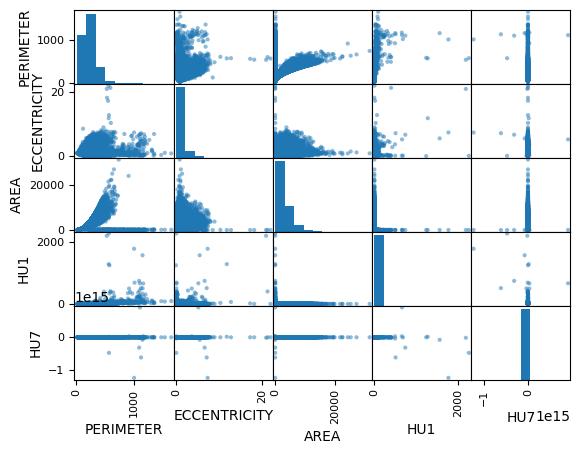

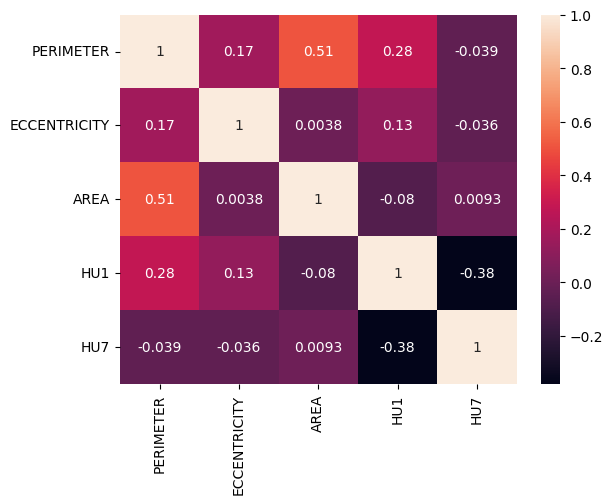

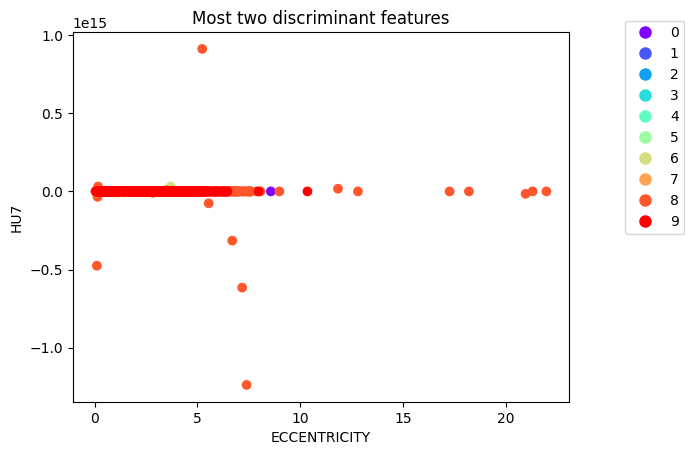

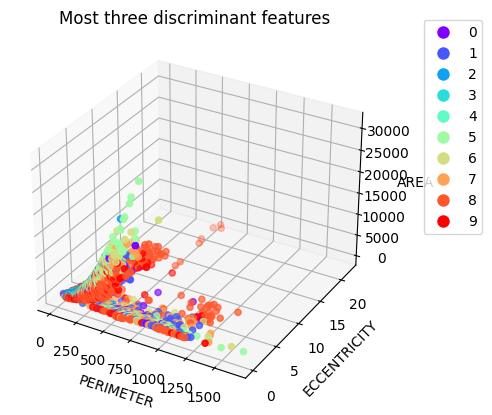

In [17]:
# sort the list of scores and features in descending order
combined_list = zip(feature_scores, feature_selected)
sorted_combined_list = sorted(combined_list, key=lambda x: x[0], reverse=True)
feature_scores_to_plot, feature_selected_to_plot = zip(*sorted_combined_list)
feature_selected_to_plot = list(feature_selected_to_plot)

# number of feature to show in scatter and heatmap plot
num_features_to_plot = 5

# scatter plot
pd.plotting.scatter_matrix(X[feature_selected_to_plot[0:num_features_to_plot]]);
plt.show()

# correlation
corr = X[feature_selected_to_plot[0:num_features_to_plot]].corr()
# heatmap
ax = sns.heatmap(corr,annot=True)
plt.show()

# plot two features in a scatter plot
classes = y.values
class_labels = np.unique(classes)
colors = cm.rainbow(np.linspace(0, 1, len(class_labels)))
color_map = colors[classes]

plt.scatter(X[feature_selected_to_plot].values[:,1], X[feature_selected_to_plot].values[:,4], c=color_map)
plt.title("Most two discriminant features")
plt.xlabel(feature_selected_to_plot[1])
plt.ylabel(feature_selected_to_plot[4])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[cls], markersize=10) for cls in class_labels]
plt.legend(legend_handles, class_labels, numpoints=1, loc='upper left', bbox_to_anchor=(1.1, 1.05));

# plot three features in a scatter plot
num_feature_1 = 0
num_feature_2 = 1
num_feature_3 = 2
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[feature_selected_to_plot[num_feature_1]], X[feature_selected_to_plot[num_feature_2]], X[feature_selected_to_plot[num_feature_3]], c=color_map, marker='o')
plt.title("Most three discriminant features")
ax.set_xlabel(feature_selected_to_plot[num_feature_1])
ax.set_ylabel(feature_selected_to_plot[num_feature_2])
ax.set_zlabel(feature_selected_to_plot[num_feature_3])
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[cls], markersize=10) for cls in class_labels]
plt.legend(legend_handles, class_labels, numpoints=1, loc='upper left', bbox_to_anchor=(1.1, 1.05));

- Receiving Operating Characteristic (need the score file)

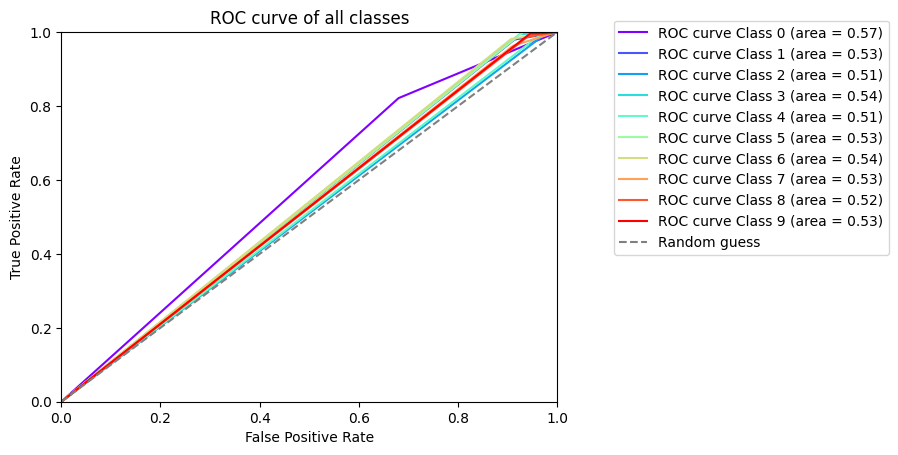

In [26]:
# read the .csv with scores
df_roc = pd.read_csv(scores_file)

# classes to identify
classes = np.unique(y).tolist()

fig = plt.figure()

# loop each class
for class_number, color in zip(classes, cm.rainbow(np.linspace(0, 1, len(classes)))):

    # select all the predicted rows belonging to a specific class
    df_label = df_roc[df_roc['LABEL'] == class_number]

    # binarize the ground truth of the rows selclass selected
    binarized_labels = label_binarize(df_label['CLASS'], classes=classes)

    # get the number of unique classes (ROC AUC is not defined if the predicted labels are only true or false)
    unique_classes = np.unique(binarized_labels[:, class_number])

    # the ROC AUC is defined only if there is more than one unique class
    if len(unique_classes) > 1:

        # calculates false positive rate and true positive rate
        fpr, tpr, thresholds = roc_curve(y_true=binarized_labels[:, class_number], y_score=df_label['SCORE'])

        # calculates the area under the ROC curve
        roc_auc = roc_auc_score(y_true=binarized_labels[:, class_number], y_score=df_label['SCORE'])

        # plots the ROC curve
        plt.plot(fpr, tpr, label='ROC curve Class %s (area = %0.2f)' % (class_number, roc_auc), color=color)

# plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of all classes')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


## Evaluation ##
The section below evaluates a True Positive Rate for each class, the accuracy on the entire dataset, and the Precision - Recall - F1 score for each class and weighted with the imbalance of the data

TPR for each class:
Class 0: 0.93 %
Class 1: 50.00 %
Class 2: 89.80 %
Class 3: 69.41 %
Class 4: 3.00 %
Class 5: 35.24 %
Class 6: 28.83 %
Class 7: 55.20 %
Class 8: 69.09 %
Class 9: 72.60 %

Accuracy on the entire dataset: 55.09 %

Precision - Recall - F1 for each class:
Class 0: precision 0.14 / recall 0.01 / F1 0.02
Class 1: precision 0.63 / recall 0.50 / F1 0.56
Class 2: precision 0.62 / recall 0.90 / F1 0.73
Class 3: precision 0.66 / recall 0.69 / F1 0.68
Class 4: precision 0.30 / recall 0.03 / F1 0.05
Class 5: precision 0.46 / recall 0.35 / F1 0.40
Class 6: precision 0.45 / recall 0.29 / F1 0.35
Class 7: precision 0.38 / recall 0.55 / F1 0.45
Class 8: precision 0.69 / recall 0.69 / F1 0.69
Class 9: precision 0.62 / recall 0.73 / F1 0.67

Weighted mean: Precision 0.52 / Recall 0.55 / F1 0.52


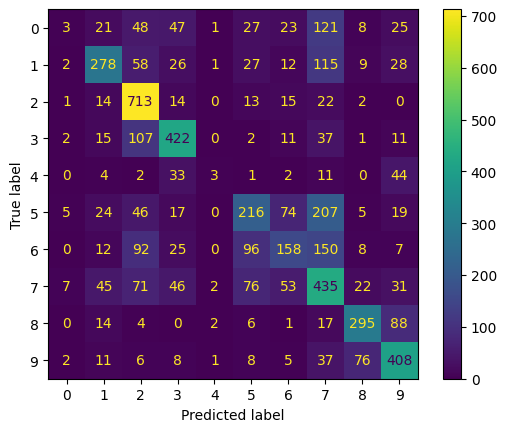

In [23]:
# get the confusion matrix
conf_mat = confusion_matrix(y_test, test_label)
n_classes = len(conf_mat)

# show the consion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=clf_final.classes_)
disp.plot()

# calculate accuracy for each class and on the entire dataset
class_accuracy_vector = []
for i in range(n_classes):
    tp = conf_mat[i, i]
    fp = sum(conf_mat[:, i]) - tp
    fn = sum(conf_mat[i, :]) - tp
    tn = sum(sum(conf_mat)) - tp - fp - fn
    tpr = (tp) / (tp + fn)
    class_accuracy_vector.append(tpr)

print("TPR for each class:")
results.write("TPR for each class:\n")
for i in range(n_classes):
    print("Class {}: {:.2f} %".format(i, round(100 * class_accuracy_vector[i], 2)))
    results.write("Class {}: {:.2f} %".format(i, round(100 * class_accuracy_vector[i], 2)))
    results.write("\n")

print("\nAccuracy on the entire dataset: " + str(round(100 * test_score,2)) + " %")
results.write("\nAccuracy on the entire dataset: " + str(round(100 * test_score,2)) + " %")
results.write("\n")

# calculate precision - recall - f1 score for each class and weighted mean
precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_label, average=None)
print("\nPrecision - Recall - F1 for each class:")
results.write("\nPrecision - Recall - F1 for each class:\n")
for i in range(n_classes):
    print("Class {}: precision {:.2f} / recall {:.2f} / F1 {:.2f}".format(i, precision[i], recall[i], f1[i]))
    results.write("Class {}: precision {:.2f} / recall {:.2f} / F1 {:.2f}".format(i, precision[i], recall[i], f1[i]))
    results.write("\n")

precision_mean, recall_mean, f1_mean, _ = precision_recall_fscore_support(y_test, test_label, average='weighted')
print("\nWeighted mean: Precision {:.2f} / Recall {:.2f} / F1 {:.2f}".format(precision_mean, recall_mean, f1_mean))
results.write("\nWeighted mean: Precision {:.2f} / Recall {:.2f} / F1 {:.2f}".format(precision_mean, recall_mean, f1_mean))
results.write("\n")
results.close()